In [41]:
#imports
import numpy as np
import scipy.stats as s
import matplotlib.pyplot as plt

(array([  2.,   2.,   4.,   4.,  12.,  20.,  24.,  42.,  82.,  94., 144.,
        171., 186., 199., 214., 190., 188., 120., 101.,  73.,  38.,  33.,
         32.,  11.,   5.,   3.,   3.,   1.,   1.,   1.]),
 array([0.01665864, 0.03675787, 0.05685711, 0.07695635, 0.09705559,
        0.11715483, 0.13725407, 0.15735331, 0.17745255, 0.19755178,
        0.21765102, 0.23775026, 0.2578495 , 0.27794874, 0.29804798,
        0.31814722, 0.33824646, 0.35834569, 0.37844493, 0.39854417,
        0.41864341, 0.43874265, 0.45884189, 0.47894113, 0.49904037,
        0.5191396 , 0.53923884, 0.55933808, 0.57943732, 0.59953656,
        0.6196358 ]),
 <BarContainer object of 30 artists>)

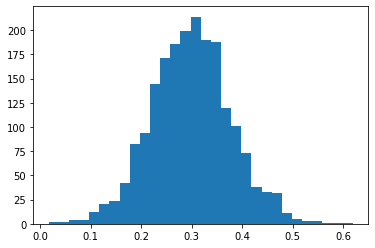

In [72]:
mean = 0.3
std = 0.08
# Create Distribution
Dist1 = s.norm(loc=mean, scale=std)
out=Dist1.rvs(2000)
plt.hist(out, bins=30)

(array([ 31., 105., 119., 142., 156., 156., 163., 156., 150., 138., 103.,
        117.,  87.,  81.,  64.,  60.,  35.,  30.,  25.,  19.,  16.,  19.,
          6.,   5.,   2.,   8.,   2.,   3.,   0.,   2.]),
 array([5.16793815e-04, 4.14041683e-02, 8.22915428e-02, 1.23178917e-01,
        1.64066292e-01, 2.04953666e-01, 2.45841041e-01, 2.86728415e-01,
        3.27615790e-01, 3.68503164e-01, 4.09390539e-01, 4.50277913e-01,
        4.91165288e-01, 5.32052662e-01, 5.72940037e-01, 6.13827411e-01,
        6.54714786e-01, 6.95602160e-01, 7.36489535e-01, 7.77376909e-01,
        8.18264284e-01, 8.59151658e-01, 9.00039033e-01, 9.40926407e-01,
        9.81813782e-01, 1.02270116e+00, 1.06358853e+00, 1.10447591e+00,
        1.14536328e+00, 1.18625065e+00, 1.22713803e+00]),
 <BarContainer object of 30 artists>)

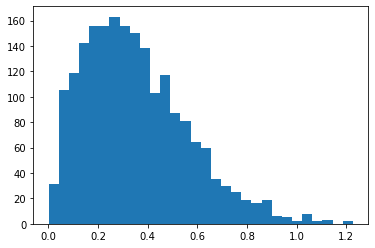

In [71]:
Dist2 = s.weibull_min(c=1.7, scale=0.4)
out=Dist2.rvs(2000)
plt.hist(out, bins=30)

(array([ 23.,  55.,  84., 104., 107., 128., 130., 117., 125., 116., 115.,
        103., 105.,  83.,  67.,  67.,  68.,  52.,  52.,  49.,  53.,  36.,
         25.,  22.,  21.,  25.,  13.,  17.,   8.,   9.,   5.,   3.,   4.,
          4.,   1.,   3.,   0.,   0.,   0.,   1.]),
 array([2.52915579e-04, 1.76751820e-02, 3.50974484e-02, 5.25197148e-02,
        6.99419812e-02, 8.73642476e-02, 1.04786514e-01, 1.22208780e-01,
        1.39631047e-01, 1.57053313e-01, 1.74475580e-01, 1.91897846e-01,
        2.09320112e-01, 2.26742379e-01, 2.44164645e-01, 2.61586912e-01,
        2.79009178e-01, 2.96431444e-01, 3.13853711e-01, 3.31275977e-01,
        3.48698244e-01, 3.66120510e-01, 3.83542776e-01, 4.00965043e-01,
        4.18387309e-01, 4.35809576e-01, 4.53231842e-01, 4.70654108e-01,
        4.88076375e-01, 5.05498641e-01, 5.22920908e-01, 5.40343174e-01,
        5.57765440e-01, 5.75187707e-01, 5.92609973e-01, 6.10032240e-01,
        6.27454506e-01, 6.44876772e-01, 6.62299039e-01, 6.79721305e-01,
      

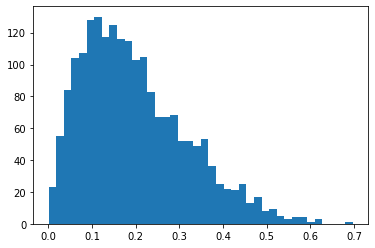

In [119]:
Dist3 = s.beta(2,8)
t=Dist3.rvs(2000)
plt.hist(t, bins=40)

In [143]:
# Let total steam flow equal the following:

S_total = np.array([[100], [100], [100], [110], [120], [130], [150], [180], [200], [100]])

In [86]:
# Pretend there are x1, x2, x3. Use norm for x1, weibull for x2, remainder for x3

def generatePriors(n):
    x = np.zeros([n,3])
    for i in range(len(x)):
        x[i,0] = Dist1.rvs(1)
        x[i,1] = Dist2.rvs(1)
        x[i,2] = 1 - x[i,0] - x[i,1]
    return x

In [120]:
# Use 3rd (beta) distribution for drynesses (all wells have same dist atm)

def generateDryness(n):
    x = np.zeros([n,3])
    for i in range(len(x)):
        for j in range(len(x[0])):
            x[i,j] = Dist3.rvs(1)
    return x

In [144]:
def generateSteamFlow(x, S_total):
    # x is n rows * xn columns
    # S_total is n * 1
    S = np.copy(x)
    for i in range(len(x)):
        S[i] = S[i] * S_total[i]

    return S

In [147]:
# Get results for these priors

n=10
x = generatePriors(n)
d = generateDryness(n)

S = generateSteamFlow(x, S_total)
M = np.divide(S,d)
M

array([[240.3409792 , 164.84107267,  73.54892263],
       [ 68.31041653, 264.38555265,  96.79155576],
       [149.21874747, 246.94843972,  97.73776531],
       [ 83.46293655, 225.91910614, 304.51645355],
       [266.04174493,  98.53624552, 626.28256839],
       [664.9987485 , 190.51218079, 288.42138253],
       [204.84288104, 270.32421679, 415.96459546],
       [571.68054497, 247.8804501 , 733.13284945],
       [272.65676561, 364.46015499, 169.80388945],
       [ 48.97231972, 522.86180655,  87.63545712]])

Text(0.5, 1.0, 'Plot of total mass flow against time')

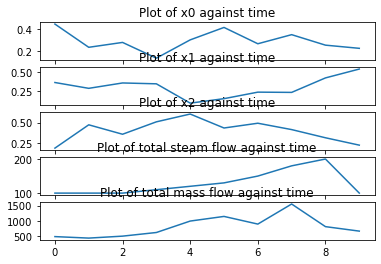

In [151]:
# plot x's against time
nx=3
# nx = number of wells
fig, ax_tup = plt.subplots(nx+2, sharex=True)

for i in range(nx):
    ax_tup[i].plot(range(n), x[:,i])
    ax_tup[i].set_title("Plot of x"+str(i)+" against time")
    
ax_tup[nx].plot(range(n), np.sum(S, axis=1))
ax_tup[nx].set_title("Plot of total steam flow against time")

ax_tup[nx+1].plot(range(n), np.sum(M, axis=1))
ax_tup[nx+1].set_title("Plot of total mass flow against time")